In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# Load the dataset
file_path = '/home/roshan/Documents/code/ISRO/Dataset.csv' # Replace with your CSV file path
data = pd.read_csv(file_path)

# Select numerical features for PCA
features_for_pca = [
    'Daily Mean PM2.5 Concentration',
    'Daily AQI Value',
    'Daily Obs Count',
    'Percent Complete',
    'Site Latitude',
    'Site Longitude',
]

X = data[features_for_pca].copy()

# Handle missing values (filling with mean for simplicity, more robust methods can be used)
X = X.fillna(X.mean())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Figure size 1200x1000 with 0 Axes>

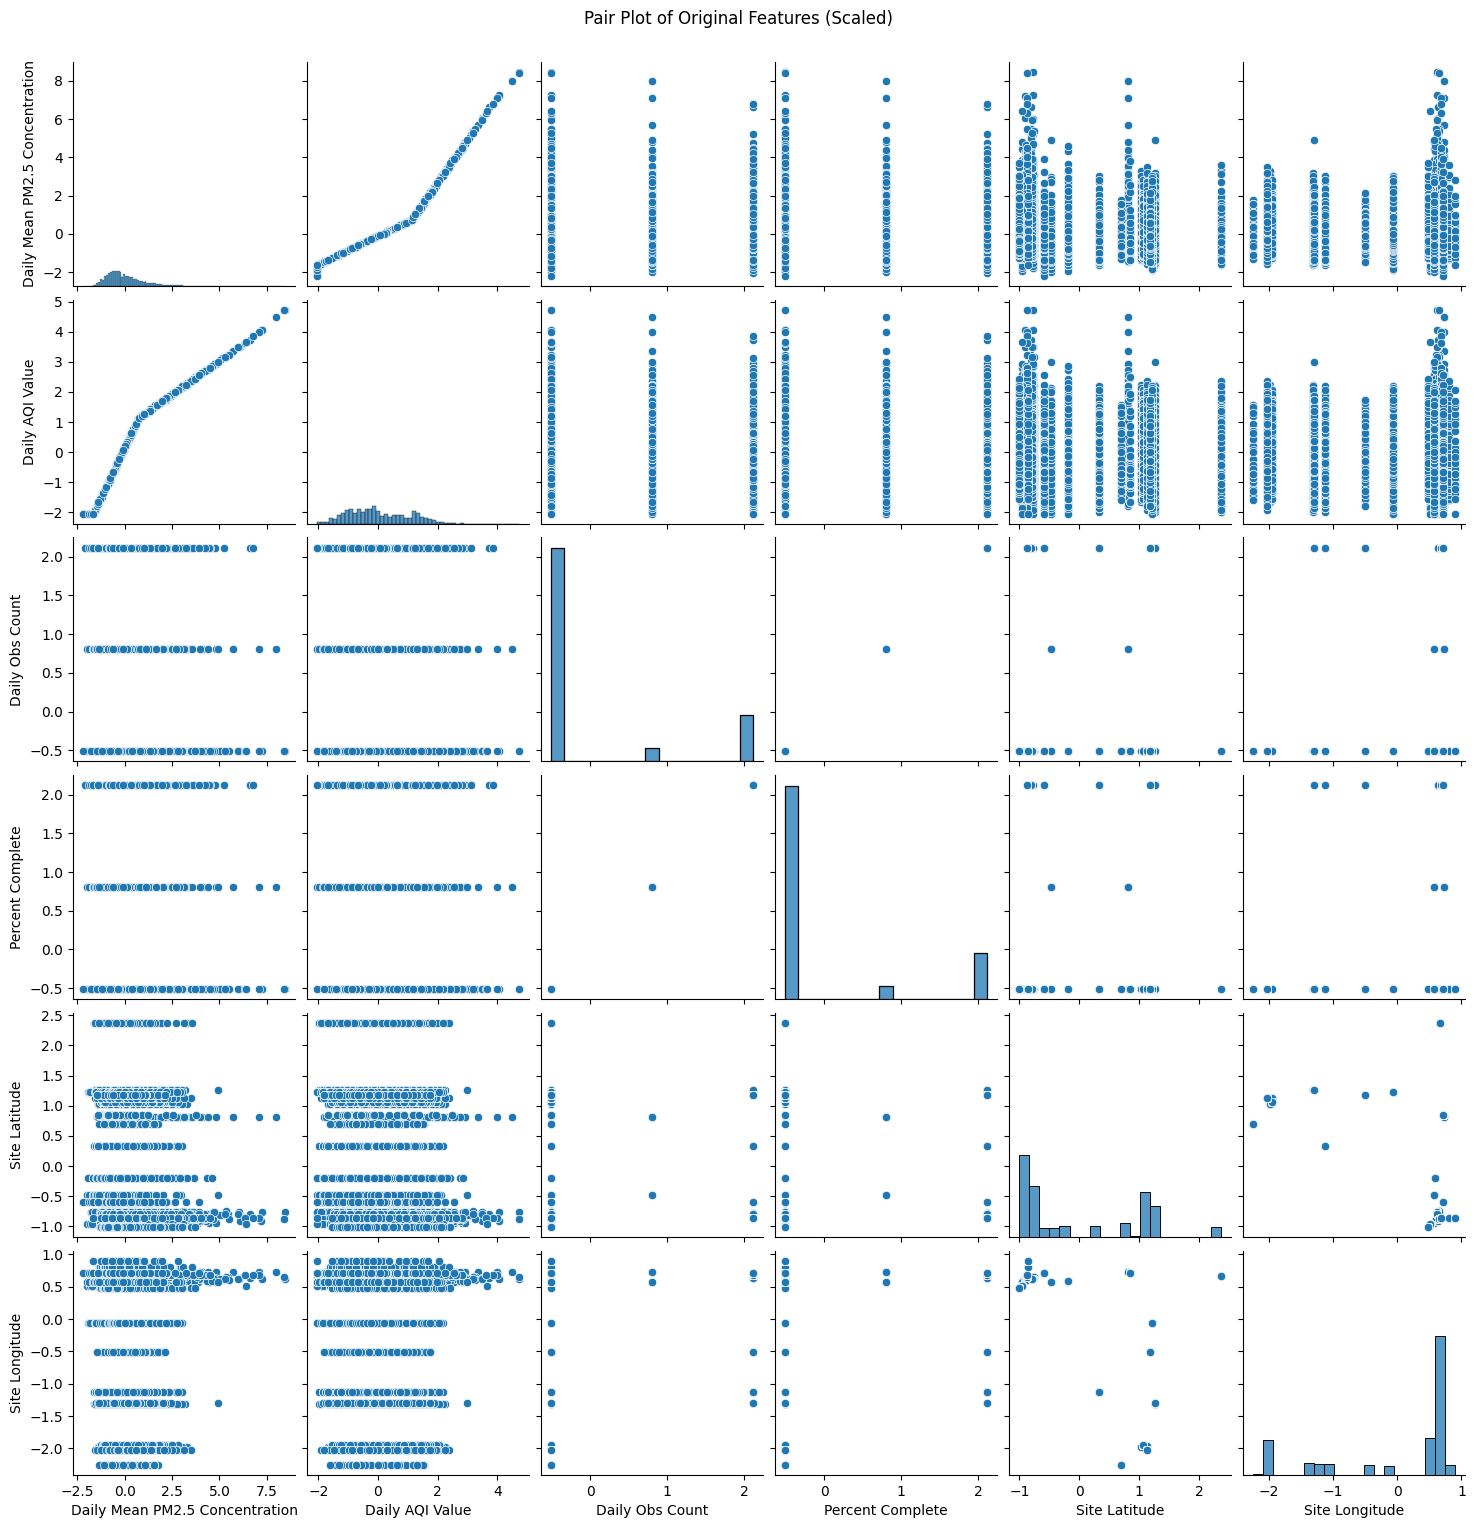

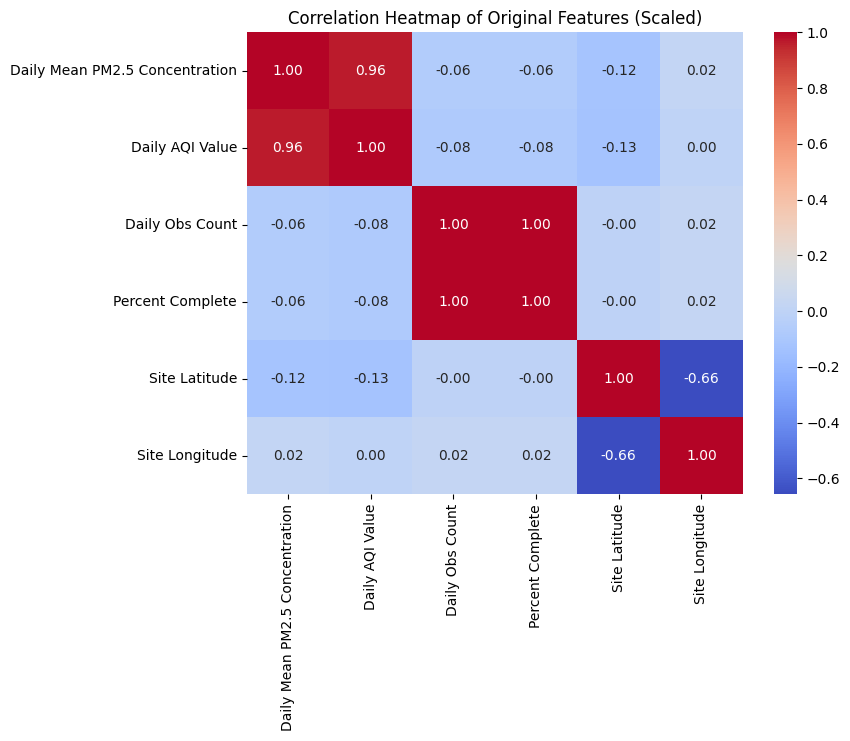

In [13]:
# Convert scaled data back to DataFrame for easier handling with feature names in visualizations
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_pca)

# Pair Plot
plt.figure(figsize=(12, 10))
sns.pairplot(X_scaled_df)
plt.suptitle('Pair Plot of Original Features (Scaled)', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = X_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Original Features (Scaled)')
plt.show()

In [14]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio per Principal Component:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio per Principal Component: [0.35675521 0.31606515 0.26526448 0.05585266 0.0060625  0.        ]
Cumulative Explained Variance: [0.35675521 0.67282036 0.93808484 0.9939375  1.         1.        ]


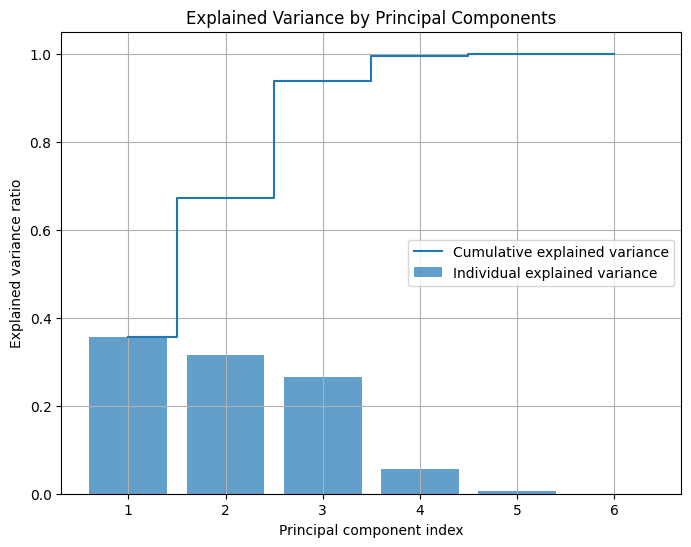

In [15]:
# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(loc='center right')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

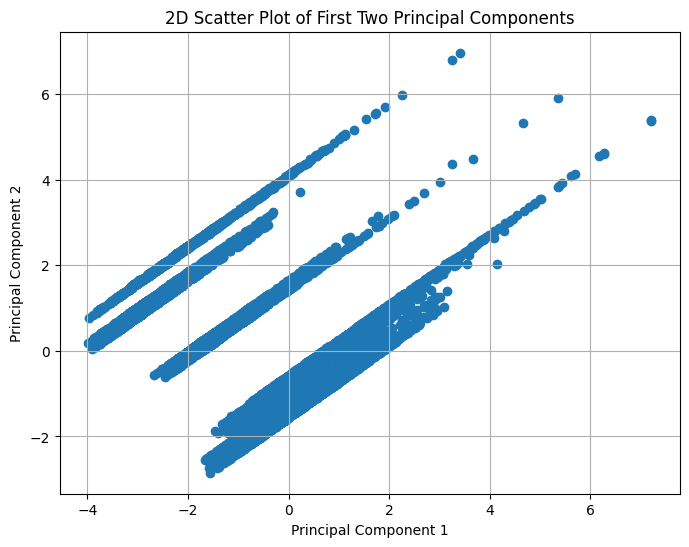

In [16]:
# Visualize first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1]) # PC1 vs PC2
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of First Two Principal Components')
plt.grid(True)
plt.show()

In [17]:
# Loadings
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=features_for_pca, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']) # Assuming 6 PCs for 6 features
print("\nLoadings (Principal Component Vectors):\n")
print(loadings_df)


Loadings (Principal Component Vectors):

     Daily Mean PM2.5 Concentration  ...  Site Longitude
PC1                    4.958336e-01  ...    7.400675e-02
PC2                    4.181286e-01  ...    2.678693e-01
PC3                   -2.771376e-01  ...    6.575021e-01
PC4                    7.495571e-02  ...    6.998132e-01
PC5                   -7.049071e-01  ...    2.686209e-02
PC6                   -2.064488e-16  ...    2.539431e-16

[6 rows x 6 columns]
